In [118]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("london_merged.csv")

In [119]:
#Understanding the dataset
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [120]:
#Summary of data statistics 
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [121]:
#Dimension of the dataset
print(df.shape)

(17414, 10)


In [10]:
# Feature Description
# "timestamp" - timestamp field for grouping the data 
# "cnt" - the count of a new bike shares 
# "t1" - real temperature in C 
# "t2" - temperature in C "feels like" 
# "hum" - humidity in percentage 
# "wind_speed" - wind speed in km/h 
# "weather_code" - category of the weather 

## "is_holiday" - boolean field - 1 holiday / 0 non holiday 

## "is_weekend" - boolean field - 1 if the day is weekend 

## "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

## "weathe_code" category description: 
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
# 2 = scattered clouds / few clouds 
# 3 = Broken clouds 
# 4 = Cloudy 
# 7 = Rain/ light Rain shower/ Light rain 
# 10 = rain with thunderstorm 
# 26 = snowfall 
# 94 = Freezing Fog



In [122]:
# Understand the dataset
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [123]:
df['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [125]:
# Preparing Timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])



In [126]:
df['year'] = df['timestamp'].apply(lambda x: x.year)

In [130]:
df['month'] = df['timestamp'].apply(lambda x: x.month)

In [128]:
df['dayofweek'] = df['timestamp'].apply(lambda x: x.dayofweek)

## "Day of week" - category field a specific day of week: 0-monday ; 1-tuesday;.. 6-sunday

In [129]:
df['hour'] = df['timestamp'].apply(lambda x: x.hour)

In [104]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,22


In [131]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [132]:
df['season']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17414, dtype: float64

<Axes: xlabel='season', ylabel='count'>

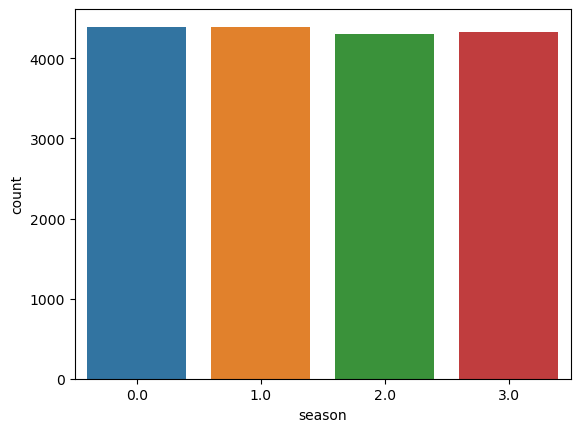

In [133]:
sns.countplot(x="season", data=df)

<Axes: xlabel='month', ylabel='count'>

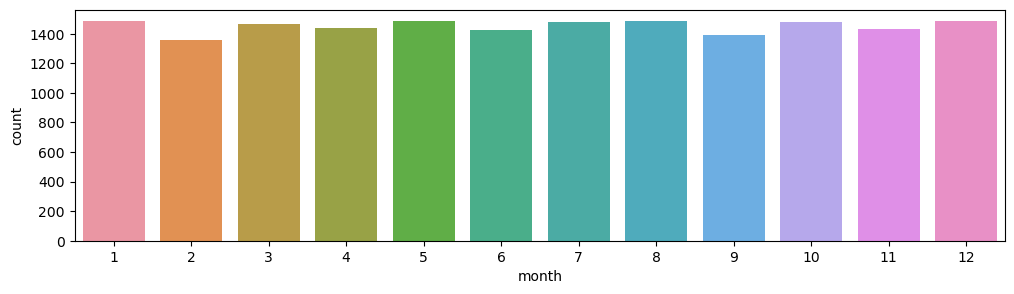

In [153]:
fig = plt.figure(figsize = (12,3))
sns.countplot(x="month", data=df)

<Axes: xlabel='season', ylabel='cnt'>

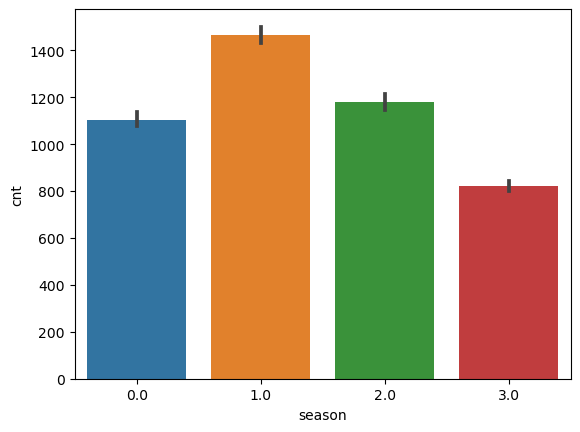

In [143]:
sns.barplot(x = df['season'], y = df['cnt'])

<Axes: xlabel='weather_code', ylabel='cnt'>

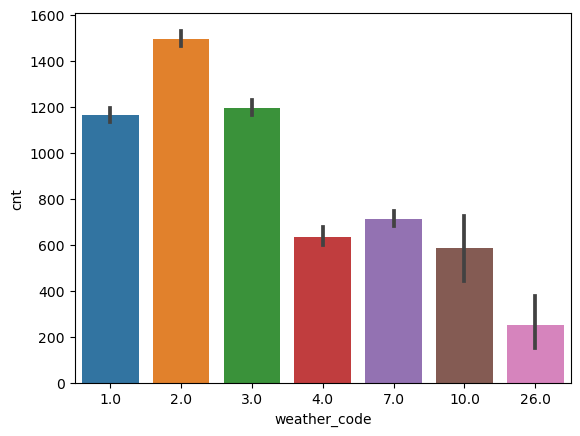

In [144]:
sns.barplot(x = df['weather_code'], y = df['cnt'])

<Axes: xlabel='is_holiday', ylabel='cnt'>

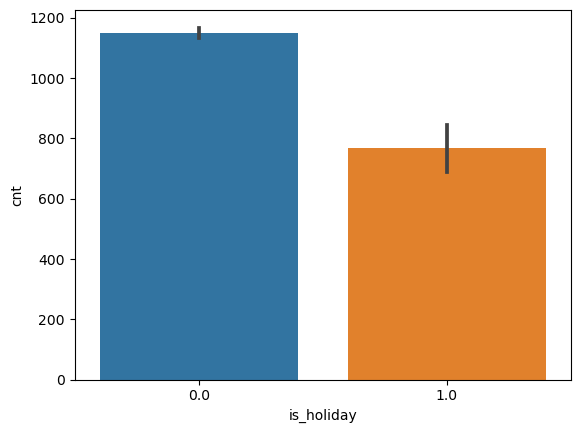

In [145]:
sns.barplot(x = df['is_holiday'], y = df['cnt'])

<Axes: xlabel='is_weekend', ylabel='cnt'>

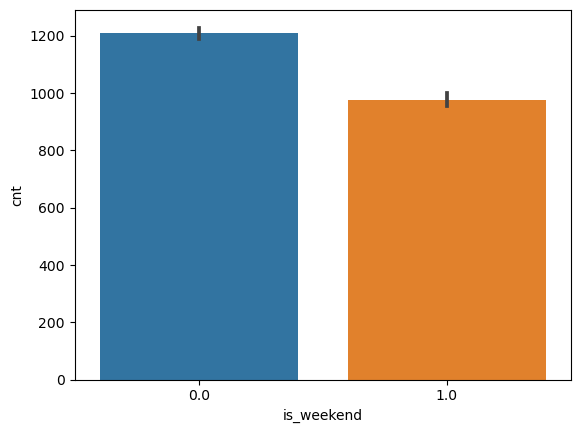

In [147]:
sns.barplot(x = df['is_weekend'], y = df['cnt'])

<Axes: xlabel='dayofweek', ylabel='cnt'>

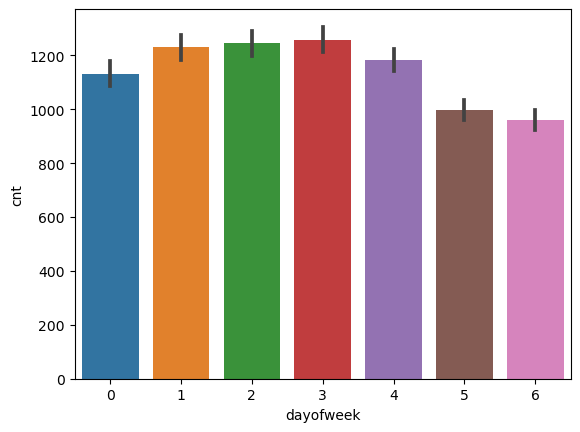

In [149]:
sns.barplot(x = df['dayofweek'], y = df['cnt'])

<Axes: xlabel='season', ylabel='count'>

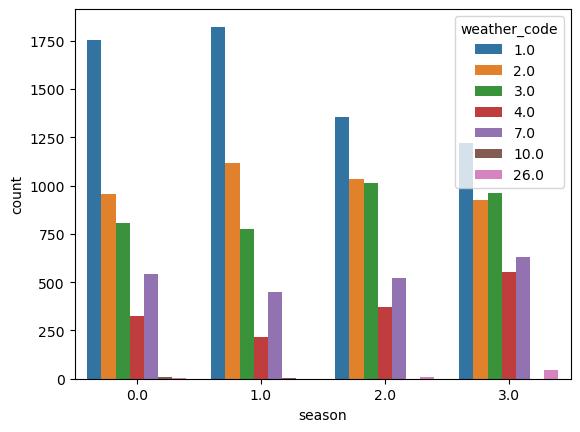

In [155]:
sns.countplot(x = df['season'], hue = df['weather_code'])

In [162]:
dayHour = df.groupby(by=['dayofweek','hour']).count().unstack()

In [158]:
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,104,104,104,104,104,104,104,105,105,105,...,104,104,105,105,105,105,104,104,105,105
1,105,105,104,104,104,104,105,105,105,105,...,105,105,105,104,104,104,104,103,102,103
2,103,103,103,103,103,103,104,104,104,104,...,104,104,104,104,104,103,104,104,104,104
3,104,104,104,104,104,104,104,104,103,104,...,104,104,104,103,103,104,104,104,104,103
4,102,102,102,101,101,101,102,101,101,102,...,102,103,103,103,103,103,103,103,102,102
5,102,102,101,101,101,101,103,103,102,103,...,104,104,104,104,104,103,103,103,103,103
6,104,104,103,104,104,104,104,104,104,104,...,105,105,105,105,105,105,105,105,105,102


<Axes: xlabel='hour', ylabel='dayofweek'>

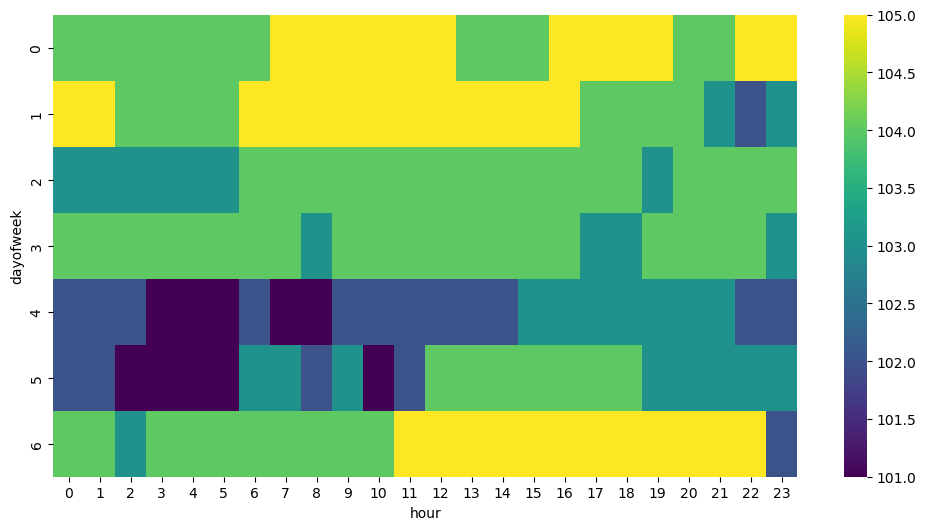

In [159]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

<Axes: xlabel='dayofweek', ylabel='cnt'>

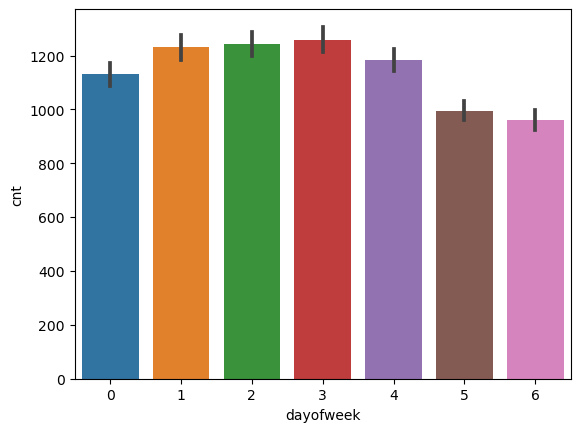

In [174]:
sns.barplot(x = df['dayofweek'], y = df['cnt'])

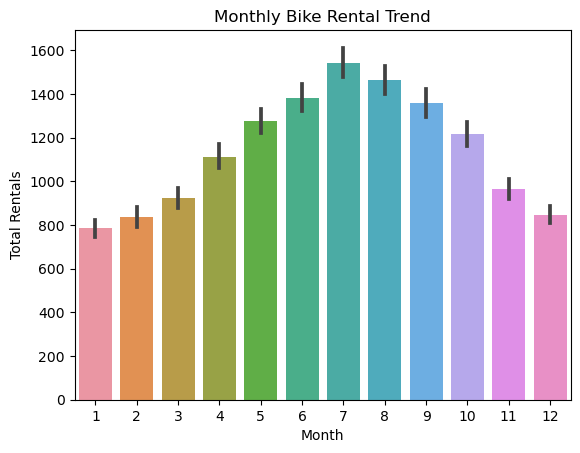

In [185]:
# Monthly Bike Rental Trend
sns.barplot(x = df['month'], y = df['cnt'])
plt.title("Monthly Bike Rental Trend")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.show()

In [176]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,dayofweek,hour,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,6,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,6,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,6,2,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,6,3,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,6,4,1


In [177]:
numeric_cols = ['t1', 't2', 'hum', 'wind_speed', 'weather_code']
correlation_matrix = df[numeric_cols].corr()


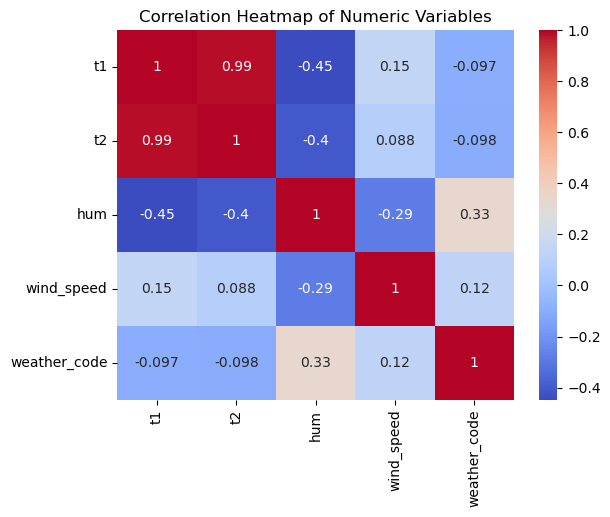

In [178]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [189]:
df['weekday'] = df['is_weekend'] == 0

In [193]:
df['weekday'].unique()

array([False,  True])

In [196]:
# Example 2: Average Bike Rentals by Hour and Weekday
hourly_weekday_avg = df.groupby(['hour', 'weekday'])['cnt'].mean().reset_index()
pivot_table = hourly_weekday_avg.pivot('hour', 'weekday', 'cnt')


/var/folders/rl/0gf2yp6d0mxcwvbb4tqm8m9w0000gn/T/ipykernel_6110/3306637896.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = hourly_weekday_avg.pivot('hour', 'weekday', 'cnt')


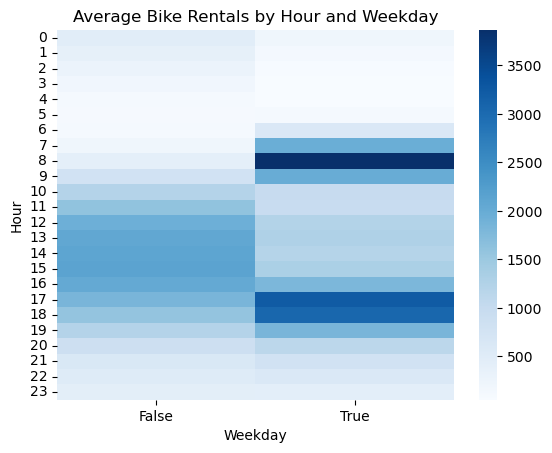

In [206]:
sns.heatmap(pivot_table, cmap='Blues')
plt.title("Average Bike Rentals by Hour and Weekday")
plt.xlabel("Weekday")
plt.ylabel("Hour")
plt.show()